# Exercise 4: K Nearest Neighbours Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

Read in the iris dataset

In [2]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


For this exercise we will chose Sepal Length and Petal Width as the classification features to use in the model.  Construct a plot to visualise the corresponding measurements with the class allocations.

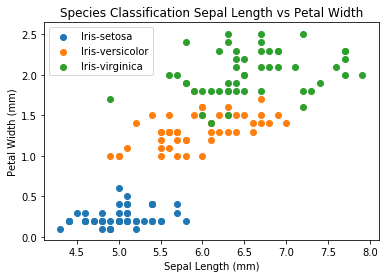

In [3]:
for name, group in df.groupby('Species'):
    plt.scatter(group['Sepal Length'], group['Petal Width'], label=name)
    
plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();


We are going to select sample 134 as the test point.  This point was specifically chosen as it lies at the boundary of two classes.  Lets remove sample 134 from the training data

In [4]:
df_test = df.iloc[134]
df = df.drop([134]) # Remove the sample
df_test

Sepal Length               6.1
Sepal Width                2.6
Petal Length               5.6
Petal Width                1.4
Species         Iris-virginica
Name: 134, dtype: object

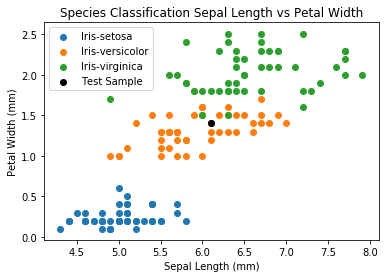

In [5]:
for name, group in df.groupby('Species'):
    plt.scatter(group['Sepal Length'], group['Petal Width'], label=name)
    
plt.scatter(df_test['Sepal Length'], df_test['Petal Width'], label='Test Sample', c='k')
plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();


Construct a KNN model with 3 nearest neighbours.  One of the great things about K-NN classifiers is that we do not need to encode the classes for the method to work.  We can simply keep the species strings:

In [9]:
model = KNN(n_neighbors=3)
model.fit(X=df[['Petal Width', 'Sepal Length']], y=df.Species)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
model.score(X=df[['Petal Width', 'Sepal Length']], y=df.Species)

0.9731543624161074

Predict the class for the test point

In [7]:
model.predict(df_test[['Petal Width', 'Sepal Length']].values.reshape((-1, 2)))[0]

'Iris-versicolor'

Compare against the actual predictions

In [8]:
df.iloc[134].Species

'Iris-virginica'

This prediction is incorrect, but given its position at the boundary this isn't necessarily surprising.